# Introduction to PyTorch
## Practical Examples: Tensors, Autograd, and Linear Regression

This notebook contains hands-on examples for the PyTorch seminar.

**Author:** Advanced Institute for Artificial Intelligence (AI2)  
**Date:** 2024

**Topics Covered:**
1. Tensor operations and mathematical operations
2. Automatic differentiation (Autograd)
3. Complete linear regression example

## Setup
Import required libraries

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Display settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.6.0
CUDA available: False


---
# Part 1: Tensor Operations

Tensors are the fundamental data structure in PyTorch - multi-dimensional arrays similar to NumPy arrays, but with GPU support and automatic differentiation.

## 1.1 Creating Tensors

In [38]:
# Create tensors from Python lists
print("=== Creating Tensors from Lists ===")

# 1D tensor (vector)
a = torch.tensor([1, 2, 3, 4, 5])
print(f"1D tensor: {a}")
print(f"Shape: {a.shape}")
print(f"Data type: {a.dtype}")

# 2D tensor (matrix)
b = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(f"\n2D tensor:\n{b}")
print(f"Shape: {b.shape}")

# 3D tensor
c = torch.tensor([[[1, 2], [3, 4]],
                  [[5, 6], [7, 8]]])
print(f"\n3D tensor:\n{c}")
print(f"Shape: {c.shape}")

=== Creating Tensors from Lists ===
1D tensor: tensor([1, 2, 3, 4, 5])
Shape: torch.Size([5])
Data type: torch.int64

2D tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])

3D tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])


In [39]:
# Create tensors with specific values
print("=== Creating Special Tensors ===")

# Zeros
zeros = torch.zeros(3, 4)
print(f"Zeros (3x4):\n{zeros}")

# Ones
ones = torch.ones(2, 3)
print(f"\nOnes (2x3):\n{ones}")

# Identity matrix
identity = torch.eye(4)
print(f"\nIdentity (4x4):\n{identity}")

# Random tensors
random_uniform = torch.rand(2, 3)  # Uniform [0, 1)
print(f"\nRandom uniform (2x3):\n{random_uniform}")

random_normal = torch.randn(2, 3)  # Normal distribution N(0, 1)
print(f"\nRandom normal (2x3):\n{random_normal}")

# Range
range_tensor = torch.arange(0, 10, 2)  # Start, end, step
print(f"\nRange [0, 10) step 2: {range_tensor}")

# Linspace
linspace_tensor = torch.linspace(0, 1, 5)  # Start, end, num_points
print(f"Linspace [0, 1] 5 points: {linspace_tensor}")

=== Creating Special Tensors ===
Zeros (3x4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Identity (4x4):
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

Random uniform (2x3):
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

Random normal (2x3):
tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])

Range [0, 10) step 2: tensor([0, 2, 4, 6, 8])
Linspace [0, 1] 5 points: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [40]:
# Conversion between NumPy and PyTorch
print("=== NumPy ↔ PyTorch Conversion ===")

# NumPy to PyTorch
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
torch_tensor = torch.from_numpy(numpy_array)
print(f"NumPy array:\n{numpy_array}")
print(f"\nPyTorch tensor:\n{torch_tensor}")

# PyTorch to NumPy
back_to_numpy = torch_tensor.numpy()
print(f"\nBack to NumPy:\n{back_to_numpy}")

# Note: They share memory!
numpy_array[0, 0] = 999
print(f"\nAfter modifying NumPy array:")
print(f"NumPy: {numpy_array[0, 0]}")
print(f"Torch: {torch_tensor[0, 0]}")
print("  They share the same memory!")

=== NumPy ↔ PyTorch Conversion ===
NumPy array:
[[1 2 3]
 [4 5 6]]

PyTorch tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])

Back to NumPy:
[[1 2 3]
 [4 5 6]]

After modifying NumPy array:
NumPy: 999
Torch: 999
  They share the same memory!


## 1.2 Tensor Attributes and Properties

In [41]:
# Understanding tensor attributes
x = torch.randn(3, 4, 5)

print("=== Tensor Attributes ===")
print(f"Tensor:\n{x[:, :, 0]}...")  # Show first slice
print(f"\nShape: {x.shape}")
print(f"Size: {x.size()}")
print(f"Number of dimensions: {x.ndim}")
print(f"Total elements: {x.numel()}")
print(f"Data type: {x.dtype}")
print(f"Device: {x.device}")
print(f"Requires gradient: {x.requires_grad}")

# Data types
print("\n=== Different Data Types ===")
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
double_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)

print(f"int32: {int_tensor.dtype}")
print(f"float32: {float_tensor.dtype}")
print(f"float64: {double_tensor.dtype}")

=== Tensor Attributes ===
Tensor:
tensor([[-0.4974,  1.6806, -0.2316, -0.3957],
        [ 0.3057, -0.6011, -1.4181,  1.1914],
        [-0.0635,  1.6992,  0.5362, -0.4816]])...

Shape: torch.Size([3, 4, 5])
Size: torch.Size([3, 4, 5])
Number of dimensions: 3
Total elements: 60
Data type: torch.float32
Device: cpu
Requires gradient: False

=== Different Data Types ===
int32: torch.int32
float32: torch.float32
float64: torch.float64


## 1.3 Mathematical Operations

In [42]:
# Element-wise operations
print("=== Element-wise Operations ===")

a = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
b = torch.tensor([5, 6, 7, 8], dtype=torch.float32)

print(f"a = {a}")
print(f"b = {b}")

# Addition
print(f"\na + b = {a + b}")
print(f"torch.add(a, b) = {torch.add(a, b)}")

# Subtraction
print(f"\na - b = {a - b}")

# Multiplication (element-wise)
print(f"\na * b = {a * b}")

# Division
print(f"\na / b = {a / b}")

# Power
print(f"\na ** 2 = {a ** 2}")

# Square root
print(f"\ntorch.sqrt(a) = {torch.sqrt(a)}")

=== Element-wise Operations ===
a = tensor([1., 2., 3., 4.])
b = tensor([5., 6., 7., 8.])

a + b = tensor([ 6.,  8., 10., 12.])
torch.add(a, b) = tensor([ 6.,  8., 10., 12.])

a - b = tensor([-4., -4., -4., -4.])

a * b = tensor([ 5., 12., 21., 32.])

a / b = tensor([0.2000, 0.3333, 0.4286, 0.5000])

a ** 2 = tensor([ 1.,  4.,  9., 16.])

torch.sqrt(a) = tensor([1.0000, 1.4142, 1.7321, 2.0000])


In [43]:
# Broadcasting
print("=== Broadcasting ===")

a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
b = torch.tensor([10, 20, 30])

print(f"a (2x3):\n{a}")
print(f"\nb (3,): {b}")
print(f"\na + b (broadcasting):\n{a + b}")

# Scalar operations
print(f"\na * 2:\n{a * 2}")
print(f"\na + 10:\n{a + 10}")

=== Broadcasting ===
a (2x3):
tensor([[1, 2, 3],
        [4, 5, 6]])

b (3,): tensor([10, 20, 30])

a + b (broadcasting):
tensor([[11, 22, 33],
        [14, 25, 36]])

a * 2:
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

a + 10:
tensor([[11, 12, 13],
        [14, 15, 16]])


In [44]:
# Matrix operations
print("=== Matrix Operations ===")

A = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float32)
B = torch.tensor([[5, 6],
                  [7, 8]], dtype=torch.float32)

print(f"A (2x2):\n{A}")
print(f"\nB (2x2):\n{B}")

# Matrix multiplication
print(f"\nA @ B (matrix multiply):\n{A @ B}")
print(f"\ntorch.matmul(A, B):\n{torch.matmul(A, B)}")

# Element-wise multiplication (different!)
print(f"\nA * B (element-wise):\n{A * B}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

# Dot product (for vectors)
v1 = torch.tensor([1, 2, 3], dtype=torch.float32)
v2 = torch.tensor([4, 5, 6], dtype=torch.float32)
print(f"\nv1 = {v1}")
print(f"v2 = {v2}")
print(f"v1 · v2 = {torch.dot(v1, v2)}")

=== Matrix Operations ===
A (2x2):
tensor([[1., 2.],
        [3., 4.]])

B (2x2):
tensor([[5., 6.],
        [7., 8.]])

A @ B (matrix multiply):
tensor([[19., 22.],
        [43., 50.]])

torch.matmul(A, B):
tensor([[19., 22.],
        [43., 50.]])

A * B (element-wise):
tensor([[ 5., 12.],
        [21., 32.]])

A.T (transpose):
tensor([[1., 3.],
        [2., 4.]])

v1 = tensor([1., 2., 3.])
v2 = tensor([4., 5., 6.])
v1 · v2 = 32.0


In [45]:
# Aggregation operations
print("=== Aggregation Operations ===")

x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)

print(f"x:\n{x}")

# Sum
print(f"\nSum (all): {x.sum()}")
print(f"Sum (axis=0): {x.sum(dim=0)}")
print(f"Sum (axis=1): {x.sum(dim=1)}")

# Mean
print(f"\nMean (all): {x.mean()}")
print(f"Mean (axis=0): {x.mean(dim=0)}")

# Max and min
print(f"\nMax: {x.max()}")
print(f"Min: {x.min()}")

# Max with indices
max_val, max_idx = x.max(dim=1)
print(f"\nMax per row: values={max_val}, indices={max_idx}")

# Standard deviation
print(f"\nStd: {x.std()}")

=== Aggregation Operations ===
x:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum (all): 21.0
Sum (axis=0): tensor([5., 7., 9.])
Sum (axis=1): tensor([ 6., 15.])

Mean (all): 3.5
Mean (axis=0): tensor([2.5000, 3.5000, 4.5000])

Max: 6.0
Min: 1.0

Max per row: values=tensor([3., 6.]), indices=tensor([2, 2])

Std: 1.8708287477493286


## 1.4 Indexing and Slicing

In [46]:
# Indexing (similar to NumPy)
print("=== Indexing and Slicing ===")

x = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

print(f"Original tensor:\n{x}")

# Single element
print(f"\nx[0, 1] = {x[0, 1]}")

# First row
print(f"\nx[0] = {x[0]}")

# First column
print(f"\nx[:, 0] = {x[:, 0]}")

# Slicing
print(f"\nx[0:2, 1:3]:\n{x[0:2, 1:3]}")

# Advanced indexing
print(f"\nx[[0, 2], [1, 3]] = {x[[0, 2], [1, 3]]}")

# Boolean indexing
mask = x > 5
print(f"\nMask (x > 5):\n{mask}")
print(f"\nx[x > 5] = {x[x > 5]}")

=== Indexing and Slicing ===
Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

x[0, 1] = 2

x[0] = tensor([1, 2, 3, 4])

x[:, 0] = tensor([1, 5, 9])

x[0:2, 1:3]:
tensor([[2, 3],
        [6, 7]])

x[[0, 2], [1, 3]] = tensor([ 2, 12])

Mask (x > 5):
tensor([[False, False, False, False],
        [False,  True,  True,  True],
        [ True,  True,  True,  True]])

x[x > 5] = tensor([ 6,  7,  8,  9, 10, 11, 12])


## 1.5 Reshaping Operations

In [47]:
# Reshaping tensors
print("=== Reshaping Operations ===")

x = torch.arange(12)
print(f"Original (12,): {x}")

# Reshape to 2D
x_2d = x.view(3, 4)
print(f"\nview(3, 4):\n{x_2d}")

# Reshape to 3D
x_3d = x.view(2, 2, 3)
print(f"\nview(2, 2, 3):\n{x_3d}")

# Automatic dimension inference
x_auto = x.view(3, -1)  # -1 means "infer this dimension"
print(f"\nview(3, -1):\n{x_auto}")

# Reshape (similar to view, but can copy data if needed)
x_reshaped = x.reshape(4, 3)
print(f"\nreshape(4, 3):\n{x_reshaped}")

# Flatten
x_flat = x_2d.view(-1)
print(f"\nFlatten: {x_flat}")

# Add dimension
x_unsqueezed = x.unsqueeze(0)  # Add dimension at position 0
print(f"\nunsqueeze(0) shape: {x.shape} → {x_unsqueezed.shape}")

# Remove dimension
x_squeezed = x_unsqueezed.squeeze(0)
print(f"squeeze(0) shape: {x_unsqueezed.shape} → {x_squeezed.shape}")

=== Reshaping Operations ===
Original (12,): tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

view(3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

view(2, 2, 3):
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])

view(3, -1):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

reshape(4, 3):
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

Flatten: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

unsqueeze(0) shape: torch.Size([12]) → torch.Size([1, 12])
squeeze(0) shape: torch.Size([1, 12]) → torch.Size([12])


## 1.6 GPU Operations

In [48]:
# GPU operations
print("=== GPU Operations ===")

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create tensor on CPU
x_cpu = torch.randn(3, 3)
print(f"\nTensor on CPU:")
print(f"Device: {x_cpu.device}")

if torch.cuda.is_available():
    # Move to GPU
    x_gpu = x_cpu.to(device)
    print(f"\nTensor on GPU:")
    print(f"Device: {x_gpu.device}")
    
    # Create directly on GPU
    y_gpu = torch.randn(3, 3, device=device)
    print(f"\nCreated directly on GPU:")
    print(f"Device: {y_gpu.device}")
    
    # Operations on GPU
    z_gpu = x_gpu @ y_gpu  # Matrix multiplication on GPU
    
    # Move back to CPU
    z_cpu = z_gpu.cpu()
    print(f"\nMoved back to CPU:")
    print(f"Device: {z_cpu.device}")
    
    print("\n GPU operations successful!")
else:
    print("\n  GPU not available - using CPU only")

=== GPU Operations ===
Using device: cpu

Tensor on CPU:
Device: cpu

  GPU not available - using CPU only


---
# Part 2: Automatic Differentiation (Autograd)

PyTorch's autograd engine automatically computes gradients for backpropagation.

## 2.1 Basic Autograd Example

In [49]:
# Simple gradient computation
print("=== Basic Autograd Example ===")

# Create tensor with gradient tracking
x = torch.tensor([2.0], requires_grad=True)
print(f"x = {x}")
print(f"requires_grad: {x.requires_grad}")

# Define function: y = x²
y = x ** 2
print(f"\ny = x² = {y}")

# Compute gradient dy/dx
y.backward()

# Access gradient
print(f"\nGradient dy/dx = {x.grad}")
print(f"Expected: 2x = 2(2) = 4")

print("\n Gradient computed automatically!")

=== Basic Autograd Example ===
x = tensor([2.], requires_grad=True)
requires_grad: True

y = x² = tensor([4.], grad_fn=<PowBackward0>)

Gradient dy/dx = tensor([4.])
Expected: 2x = 2(2) = 4

 Gradient computed automatically!


In [50]:
# More complex example
print("=== Complex Function ===")

# Function: z = 3x² + 2x + 1
x = torch.tensor([1.0], requires_grad=True)
z = 3 * x**2 + 2 * x + 1

print(f"x = {x.item()}")
print(f"z = 3x² + 2x + 1 = {z.item()}")

# Compute gradient
z.backward()

print(f"\nGradient dz/dx = {x.grad.item()}")
print(f"Expected: 6x + 2 = 6(1) + 2 = 8")

=== Complex Function ===
x = 1.0
z = 3x² + 2x + 1 = 6.0

Gradient dz/dx = 8.0
Expected: 6x + 2 = 6(1) + 2 = 8


## 2.2 Gradient Accumulation

In [51]:
# Understanding gradient accumulation
print("=== Gradient Accumulation ===")

x = torch.tensor([2.0], requires_grad=True)

# First computation
y = x ** 2
y.backward()
print(f"After first backward:")
print(f"  x.grad = {x.grad}")

# Second computation (without zeroing!)
z = x ** 3
z.backward()
print(f"\nAfter second backward (no zero):")
print(f"  x.grad = {x.grad}")
print(f"  Expected: 4 + 12 = 16 (accumulated!)")

# Zero gradients
x.grad.zero_()
print(f"\nAfter zeroing:")
print(f"  x.grad = {x.grad}")

# New computation
w = x ** 4
w.backward()
print(f"\nAfter new backward (with zero):")
print(f"  x.grad = {x.grad}")
print(f"  Expected: 4x³ = 4(8) = 32")

print("\n  Always zero gradients before new backward pass!")

=== Gradient Accumulation ===
After first backward:
  x.grad = tensor([4.])

After second backward (no zero):
  x.grad = tensor([16.])
  Expected: 4 + 12 = 16 (accumulated!)

After zeroing:
  x.grad = tensor([0.])

After new backward (with zero):
  x.grad = tensor([32.])
  Expected: 4x³ = 4(8) = 32

  Always zero gradients before new backward pass!


## 2.3 Computational Graph

In [52]:
# Understanding the computational graph
print("=== Computational Graph ===")

# Create tensors
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)
w = torch.tensor([4.0], requires_grad=True)

print("Variables:")
print(f"  x = {x.item()}")
print(f"  y = {y.item()}")
print(f"  w = {w.item()}")

# Build computational graph
# z = (x + y) * w
a = x + y
z = a * w

print(f"\nComputation:")
print(f"  a = x + y = {a.item()}")
print(f"  z = a * w = {z.item()}")

# Compute gradients
z.backward()

print(f"\nGradients:")
print(f"  dz/dx = {x.grad.item()} (Expected: w = 4)")
print(f"  dz/dy = {y.grad.item()} (Expected: w = 4)")
print(f"  dz/dw = {w.grad.item()} (Expected: a = 5)")

print("\n Chain rule applied automatically!")

=== Computational Graph ===
Variables:
  x = 2.0
  y = 3.0
  w = 4.0

Computation:
  a = x + y = 5.0
  z = a * w = 20.0

Gradients:
  dz/dx = 4.0 (Expected: w = 4)
  dz/dy = 4.0 (Expected: w = 4)
  dz/dw = 5.0 (Expected: a = 5)

 Chain rule applied automatically!


## 2.4 Detaching from Computational Graph

In [53]:
# Detaching tensors
print("=== Detaching Tensors ===")

x = torch.tensor([2.0], requires_grad=True)
y = x ** 2

print(f"y requires_grad: {y.requires_grad}")

# Detach from graph
y_detached = y.detach()
print(f"y_detached requires_grad: {y_detached.requires_grad}")

# Using torch.no_grad() context
with torch.no_grad():
    z = x ** 3
    print(f"\nInside no_grad context:")
    print(f"  z requires_grad: {z.requires_grad}")

print("\n Use no_grad() for inference to save memory!")

=== Detaching Tensors ===
y requires_grad: True
y_detached requires_grad: False

Inside no_grad context:
  z requires_grad: False

 Use no_grad() for inference to save memory!


## 2.5 Gradients for Vector Functions

In [54]:
# Gradients for vectors
print("=== Vector Gradients ===")

# Vector input
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(f"x = {x}")

# Vector function: y = x²
y = x ** 2
print(f"y = x² = {y}")

# Compute scalar output (needed for backward)
z = y.sum()
print(f"z = sum(y) = {z.item()}")

# Backward
z.backward()

print(f"\nGradients dz/dx = {x.grad}")
print(f"Expected: 2x = {2 * x.detach()}")

# Alternative: provide gradient argument
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x ** 2
y.backward(torch.ones_like(y))  # Specify gradient
print(f"\nUsing gradient argument:")
print(f"  x.grad = {x.grad}")

=== Vector Gradients ===
x = tensor([1., 2., 3.], requires_grad=True)
y = x² = tensor([1., 4., 9.], grad_fn=<PowBackward0>)
z = sum(y) = 14.0

Gradients dz/dx = tensor([2., 4., 6.])
Expected: 2x = tensor([2., 4., 6.])

Using gradient argument:
  x.grad = tensor([2., 4., 6.])


## 2.6 Practical Example: Optimize a Function

=== Finding Function Minimum ===
Step 0: x = 0.6000, f(x) = 14.0000
Step 10: x = 2.7423, f(x) = 5.1038
Step 20: x = 2.9723, f(x) = 5.0012
Step 30: x = 2.9970, f(x) = 5.0000
Step 40: x = 2.9997, f(x) = 5.0000

Final: x = 3.0000, f(x) = 5.0000
Expected: x = 3.0, f(x) = 5.0


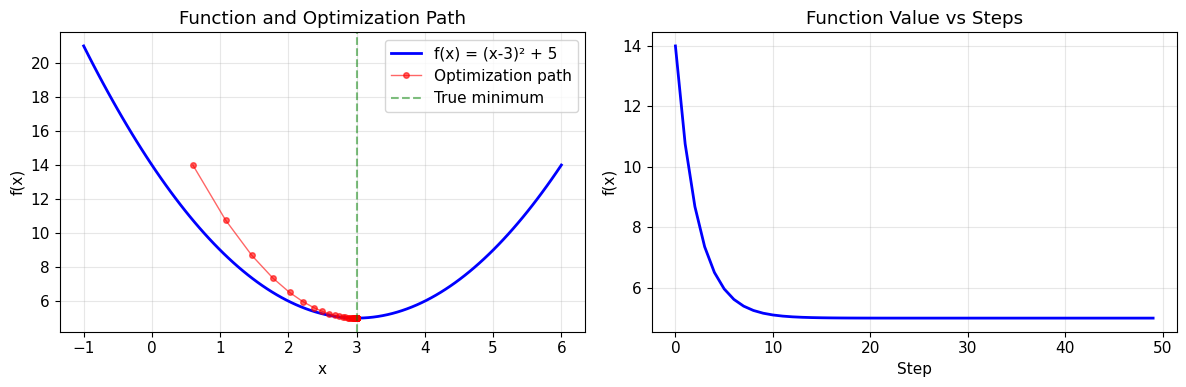


 Autograd found the minimum!


In [55]:
# Use autograd to find minimum of a function
print("=== Finding Function Minimum ===")

# Function: f(x) = (x - 3)² + 5
# Minimum should be at x = 3, f(3) = 5

# Start with initial guess
x = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1
num_steps = 50

history = []

for step in range(num_steps):
    # Compute function value
    f = (x - 3) ** 2 + 5
    
    # Compute gradient
    f.backward()
    
    # Update x (gradient descent)
    with torch.no_grad():
        x -= learning_rate * x.grad
    
    # Store for plotting
    history.append((x.item(), f.item()))
    
    # Zero gradient
    x.grad.zero_()
    
    if step % 10 == 0:
        print(f"Step {step}: x = {x.item():.4f}, f(x) = {f.item():.4f}")

print(f"\nFinal: x = {x.item():.4f}, f(x) = {f.item():.4f}")
print(f"Expected: x = 3.0, f(x) = 5.0")

# Plot optimization path
x_vals = [h[0] for h in history]
f_vals = [h[1] for h in history]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
x_plot = np.linspace(-1, 6, 100)
f_plot = (x_plot - 3) ** 2 + 5
plt.plot(x_plot, f_plot, 'b-', linewidth=2, label='f(x) = (x-3)² + 5')
plt.plot(x_vals, f_vals, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='Optimization path')
plt.axvline(x=3, color='g', linestyle='--', alpha=0.5, label='True minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Optimization Path')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(f_vals, 'b-', linewidth=2)
plt.xlabel('Step')
plt.ylabel('f(x)')
plt.title('Function Value vs Steps')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Autograd found the minimum!")

---
# Part 3: Linear Regression with PyTorch

Complete example of training a linear regression model from scratch.

## 3.1 Generate Synthetic Data

In [56]:
# Generate synthetic data for linear regression
print("=== Generating Training Data ===")

# Set random seed
torch.manual_seed(42)

# True parameters: price = 2 * size + 3 (in thousands)
true_w = 2.0
true_b = 3.0

# Generate data
n_samples = 100
X = torch.randn(n_samples, 1) * 10  # House sizes: random around 0, scaled
noise = torch.randn(n_samples, 1) * 2  # Add noise
y = true_w * X + true_b + noise  # Prices

print(f"Generated {n_samples} samples")
print(f"True equation: price = {true_w} * size + {true_b}")
print(f"\nData shapes:")
print(f"  X: {X.shape}")
print(f"  y: {y.shape}")
print(f"\nFirst 5 samples:")
for i in range(5):
    print(f"  Size: {X[i, 0].item():6.2f} m² → Price: R$ {y[i, 0].item():.2f}k")

=== Generating Training Data ===
Generated 100 samples
True equation: price = 2.0 * size + 3.0

Data shapes:
  X: torch.Size([100, 1])
  y: torch.Size([100, 1])

First 5 samples:
  Size:  19.27 m² → Price: R$ 42.99k
  Size:  14.87 m² → Price: R$ 32.93k
  Size:   9.01 m² → Price: R$ 20.24k
  Size: -21.06 m² → Price: R$ -38.05k
  Size:   6.78 m² → Price: R$ 18.63k


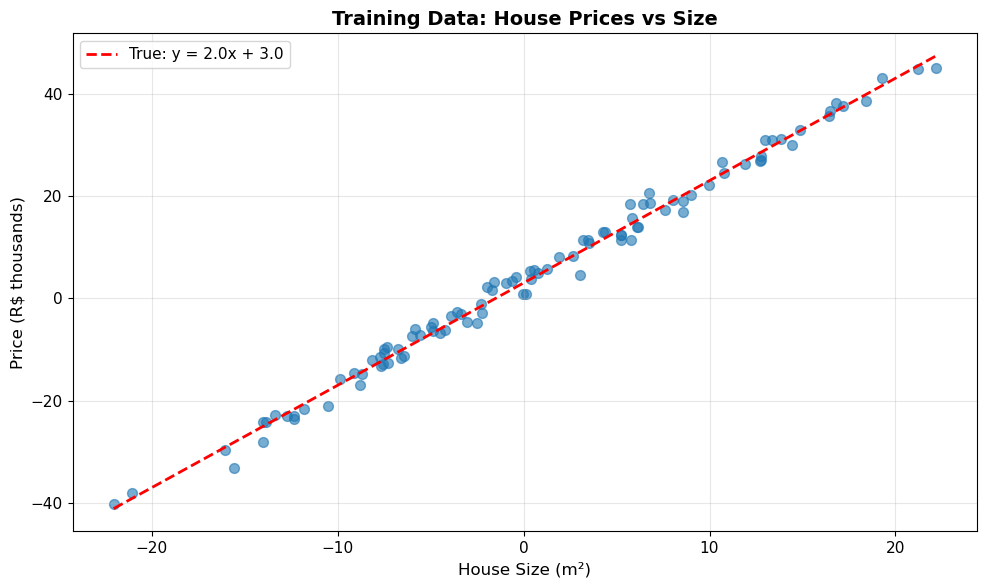

In [57]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), alpha=0.6, s=50)
plt.xlabel('House Size (m²)', fontsize=12)
plt.ylabel('Price (R$ thousands)', fontsize=12)
plt.title('Training Data: House Prices vs Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot true line
x_line = torch.linspace(X.min(), X.max(), 100)
y_line = true_w * x_line + true_b
plt.plot(x_line.numpy(), y_line.numpy(), 'r--', linewidth=2, 
         label=f'True: y = {true_w}x + {true_b}')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

## 3.2 Method 1: Manual Training Loop

In [58]:
# Manual implementation (for understanding)
print("=== Manual Training Loop ===")

# Initialize parameters randomly
torch.manual_seed(42)
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"Initial parameters:")
print(f"  w = {w.item():.4f}")
print(f"  b = {b.item():.4f}")

# Hyperparameters
learning_rate = 0.01
num_epochs = 100

# Store losses for plotting
losses_manual = []

# Training loop
for epoch in range(num_epochs):
    # 1. Forward pass
    y_pred = X @ w + b
    
    # 2. Compute loss (MSE)
    loss = torch.mean((y_pred - y) ** 2)
    
    # 3. Backward pass
    loss.backward()
    
    # 4. Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    # 5. Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Store loss
    losses_manual.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
              f'w: {w.item():.4f}, b: {b.item():.4f}')

print(f"\nFinal parameters:")
print(f"  w = {w.item():.4f} (true: {true_w})")
print(f"  b = {b.item():.4f} (true: {true_b})")
print(f"  Final loss: {loss.item():.4f}")

=== Manual Training Loop ===
Initial parameters:
  w = 0.3367
  b = 0.1288
Epoch [20/100], Loss: 27.2643, w: 1.5883, b: 1.1083
Epoch [40/100], Loss: 6.1952, w: 1.9026, b: 1.7599
Epoch [60/100], Loss: 4.0009, w: 1.9805, b: 2.1947
Epoch [80/100], Loss: 3.4829, w: 1.9991, b: 2.4853
Epoch [100/100], Loss: 3.2810, w: 2.0031, b: 2.6795

Final parameters:
  w = 2.0031 (true: 2.0)
  b = 2.6795 (true: 3.0)
  Final loss: 3.2810


## 3.3 Method 2: Using nn.Module (Standard Way)

In [59]:
# Define model using nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        # Define a linear layer: y = Wx + b
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        # Define forward pass
        return self.linear(x)

# Create model
model = LinearRegressionModel(input_dim=1, output_dim=1)

print("=== Model Definition ===")
print(model)
print("\nModel parameters:")
for name, param in model.named_parameters():
    print(f"  {name}: shape={param.shape}, requires_grad={param.requires_grad}")

=== Model Definition ===
LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Model parameters:
  linear.weight: shape=torch.Size([1, 1]), requires_grad=True
  linear.bias: shape=torch.Size([1]), requires_grad=True


In [60]:
# Define loss function and optimizer
print("=== Training Setup ===")

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()
print(f"Loss function: {criterion}")

# Optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)
print(f"Optimizer: {optimizer}")

print("\n Ready to train!")

=== Training Setup ===
Loss function: MSELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

 Ready to train!


In [61]:
# Training loop
print("=== Training Loop ===")

num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # 1. Forward pass
    y_pred = model(X)
    
    # 2. Compute loss
    loss = criterion(y_pred, y)
    
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4. Backward pass
    loss.backward()
    
    # 5. Update weights
    optimizer.step()
    
    # Store loss
    losses.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        w = model.linear.weight.item()
        b = model.linear.bias.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
              f'w: {w:.4f}, b: {b:.4f}')

# Final parameters
final_w = model.linear.weight.item()
final_b = model.linear.bias.item()

print(f"\n=== Training Complete ===")
print(f"Final parameters:")
print(f"  w = {final_w:.4f} (true: {true_w})")
print(f"  b = {final_b:.4f} (true: {true_b})")
print(f"  Final loss: {losses[-1]:.4f}")
print(f"\nLearned equation: price = {final_w:.2f} * size + {final_b:.2f}")
print(f"True equation:    price = {true_w:.2f} * size + {true_b:.2f}")

=== Training Loop ===
Epoch [20/100], Loss: 42.5448, w: 1.4474, b: 1.1585
Epoch [40/100], Loss: 7.0958, w: 1.8668, b: 1.7938
Epoch [60/100], Loss: 4.0235, w: 1.9714, b: 2.2175
Epoch [80/100], Loss: 3.4687, w: 1.9967, b: 2.5006
Epoch [100/100], Loss: 3.2731, w: 2.0024, b: 2.6897

=== Training Complete ===
Final parameters:
  w = 2.0024 (true: 2.0)
  b = 2.6897 (true: 3.0)
  Final loss: 3.2731

Learned equation: price = 2.00 * size + 2.69
True equation:    price = 2.00 * size + 3.00


## 3.4 Visualize Training Progress

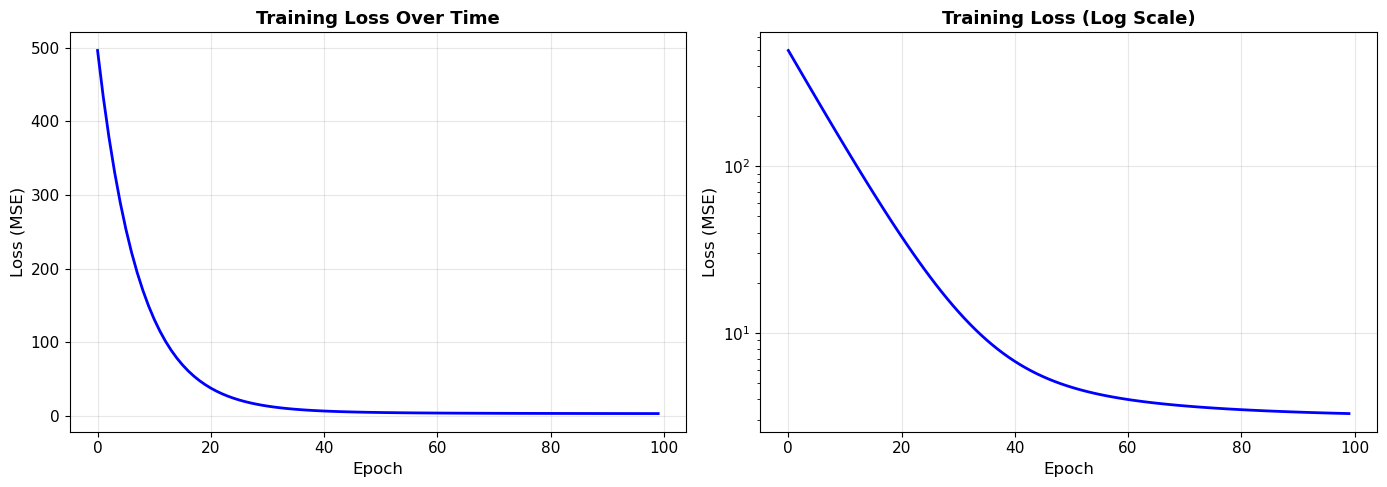

Initial loss: 496.0679
Final loss:   3.2731
Reduction:    99.3%


In [62]:
# Plot training loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(losses, linewidth=2, color='blue')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training Loss Over Time', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Log scale for better visualization
axes[1].plot(losses, linewidth=2, color='blue')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss (MSE)', fontsize=12)
axes[1].set_title('Training Loss (Log Scale)', fontsize=13, fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial loss: {losses[0]:.4f}")
print(f"Final loss:   {losses[-1]:.4f}")
print(f"Reduction:    {(1 - losses[-1]/losses[0]) * 100:.1f}%")

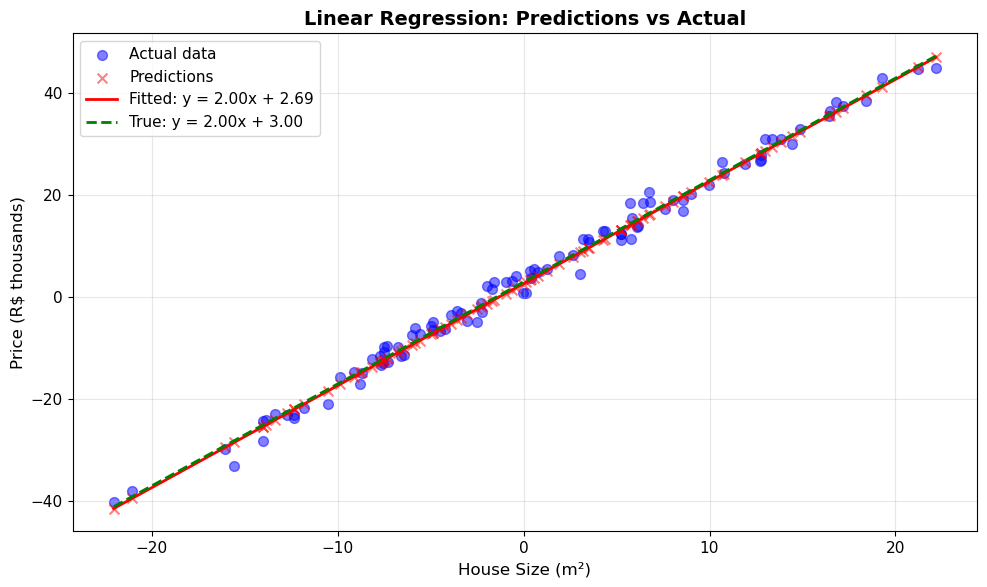

In [63]:
# Plot predictions vs actual
model.eval()  # Set to evaluation mode

with torch.no_grad():
    predictions = model(X)

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(X.numpy(), y.numpy(), alpha=0.5, s=50, label='Actual data', color='blue')
plt.scatter(X.numpy(), predictions.numpy(), alpha=0.5, s=50, 
            label='Predictions', color='red', marker='x')

# Plot fitted line
x_line = torch.linspace(X.min(), X.max(), 100).reshape(-1, 1)
with torch.no_grad():
    y_line = model(x_line)
plt.plot(x_line.numpy(), y_line.numpy(), 'r-', linewidth=2, 
         label=f'Fitted: y = {final_w:.2f}x + {final_b:.2f}')

# Plot true line
y_true_line = true_w * x_line + true_b
plt.plot(x_line.numpy(), y_true_line.numpy(), 'g--', linewidth=2, 
         label=f'True: y = {true_w:.2f}x + {true_b:.2f}')

plt.xlabel('House Size (m²)', fontsize=12)
plt.ylabel('Price (R$ thousands)', fontsize=12)
plt.title('Linear Regression: Predictions vs Actual', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3.5 Model Evaluation

In [64]:
# Evaluate model performance
print("=== Model Evaluation ===")

model.eval()

with torch.no_grad():
    predictions = model(X)
    
    # Mean Squared Error
    mse = criterion(predictions, y)
    
    # Root Mean Squared Error
    rmse = torch.sqrt(mse)
    
    # Mean Absolute Error
    mae = torch.mean(torch.abs(predictions - y))
    
    # R² score (coefficient of determination)
    ss_res = torch.sum((y - predictions) ** 2)
    ss_tot = torch.sum((y - y.mean()) ** 2)
    r2 = 1 - ss_res / ss_tot

print(f"Performance Metrics:")
print(f"  MSE:  {mse.item():.4f}")
print(f"  RMSE: {rmse.item():.4f}")
print(f"  MAE:  {mae.item():.4f}")
print(f"  R²:   {r2.item():.4f}")

print(f"\n R² = {r2.item():.4f} means model explains {r2.item()*100:.1f}% of variance")

=== Model Evaluation ===
Performance Metrics:
  MSE:  3.2670
  RMSE: 1.8075
  MAE:  1.5117
  R²:   0.9916

 R² = 0.9916 means model explains 99.2% of variance


## 3.6 Making Predictions

In [65]:
# Use the trained model for predictions
print("=== Making Predictions ===")

model.eval()

# New house sizes
new_sizes = torch.tensor([[30.0],
                          [50.0],
                          [75.0],
                          [100.0]])

# Make predictions
with torch.no_grad():
    predicted_prices = model(new_sizes)

# Display results
print("\nPredictions for new houses:")
print("─" * 50)
print(f"{'Size (m²)':>12} │ {'Predicted Price':>20}")
print("─" * 50)
for size, price in zip(new_sizes, predicted_prices):
    print(f"{size.item():>12.1f} │ R$ {price.item():>15.2f}k")
print("─" * 50)

# Compare with true values
print("\nComparison with true equation:")
print("─" * 70)
print(f"{'Size':>12} │ {'Predicted':>15} │ {'True':>15} │ {'Error':>15}")
print("─" * 70)
with torch.no_grad():
    for size in new_sizes:
        pred = model(size).item()
        true = (true_w * size + true_b).item()
        error = abs(pred - true)
        print(f"{size.item():>12.1f} │ R$ {pred:>11.2f}k │ R$ {true:>11.2f}k │ R$ {error:>11.2f}k")
print("─" * 70)

=== Making Predictions ===

Predictions for new houses:
──────────────────────────────────────────────────
   Size (m²) │      Predicted Price
──────────────────────────────────────────────────
        30.0 │ R$           62.76k
        50.0 │ R$          102.81k
        75.0 │ R$          152.87k
       100.0 │ R$          202.93k
──────────────────────────────────────────────────

Comparison with true equation:
──────────────────────────────────────────────────────────────────────
        Size │       Predicted │            True │           Error
──────────────────────────────────────────────────────────────────────
        30.0 │ R$       62.76k │ R$       63.00k │ R$        0.24k
        50.0 │ R$      102.81k │ R$      103.00k │ R$        0.19k
        75.0 │ R$      152.87k │ R$      153.00k │ R$        0.13k
       100.0 │ R$      202.93k │ R$      203.00k │ R$        0.07k
──────────────────────────────────────────────────────────────────────


## 3.7 Saving and Loading the Model

In [66]:
# Save the trained model
print("=== Saving Model ===")

model_path = 'linear_regression_model.pth'
torch.save(model.state_dict(), model_path)
print(f" Model saved to: {model_path}")

# Load the model
print("\n=== Loading Model ===")

# 1. Create model architecture
loaded_model = LinearRegressionModel(input_dim=1, output_dim=1)

# 2. Load saved parameters
loaded_model.load_state_dict(torch.load(model_path))

# 3. Set to evaluation mode
loaded_model.eval()

print(f" Model loaded from: {model_path}")

# Verify loaded model works
test_input = torch.tensor([[75.0]])
with torch.no_grad():
    original_pred = model(test_input)
    loaded_pred = loaded_model(test_input)

print(f"\nVerification:")
print(f"  Input: {test_input.item():.1f} m²")
print(f"  Original model prediction: R$ {original_pred.item():.2f}k")
print(f"  Loaded model prediction:   R$ {loaded_pred.item():.2f}k")
print(f"  Match: {torch.allclose(original_pred, loaded_pred)}")

=== Saving Model ===
 Model saved to: linear_regression_model.pth

=== Loading Model ===
 Model loaded from: linear_regression_model.pth

Verification:
  Input: 75.0 m²
  Original model prediction: R$ 152.87k
  Loaded model prediction:   R$ 152.87k
  Match: True


## 3.8 Comparing Manual vs nn.Module

=== Comparison: Manual vs nn.Module ===


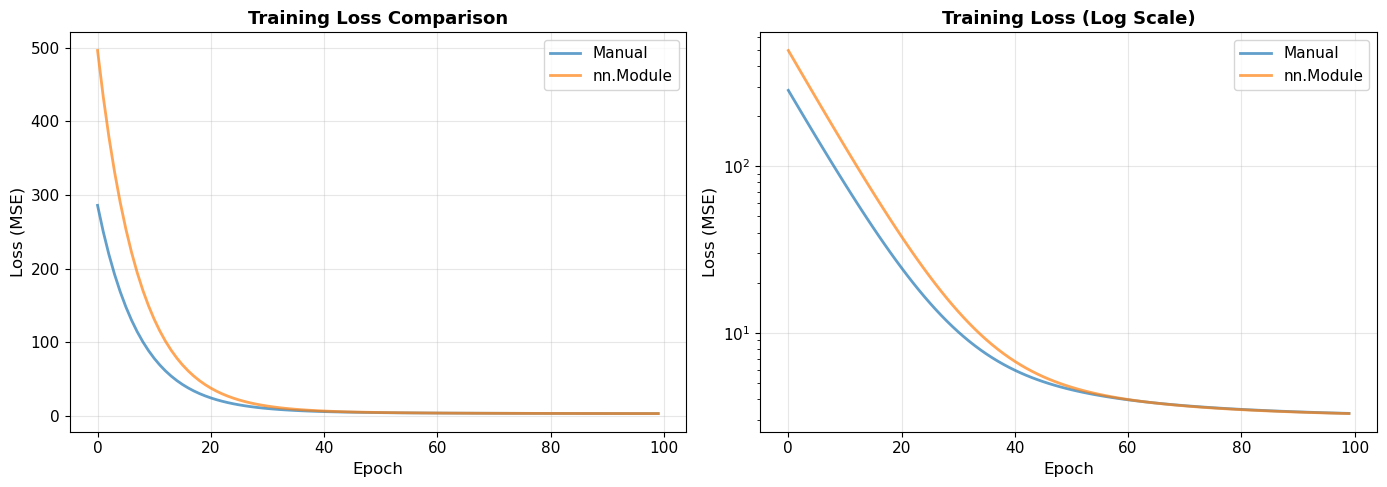


  Both methods achieve similar results!

 Manual method: Good for understanding
 nn.Module method: Standard practice, scales to complex models


In [67]:
# Compare both training methods
print("=== Comparison: Manual vs nn.Module ===")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot both loss curves
axes[0].plot(losses_manual, linewidth=2, label='Manual', alpha=0.7)
axes[0].plot(losses, linewidth=2, label='nn.Module', alpha=0.7)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training Loss Comparison', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].plot(losses_manual, linewidth=2, label='Manual', alpha=0.7)
axes[1].plot(losses, linewidth=2, label='nn.Module', alpha=0.7)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss (MSE)', fontsize=12)
axes[1].set_title('Training Loss (Log Scale)', fontsize=13, fontweight='bold')
axes[1].set_yscale('log')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n  Both methods achieve similar results!")
print("\n Manual method: Good for understanding")
print(" nn.Module method: Standard practice, scales to complex models")

---
# Summary and Key Takeaways

PART 1: TENSORS                                         
  • Tensors are multi-dimensional arrays                
  • Similar to NumPy, but with GPU support              
  • Rich mathematical operations                        
  • Easy conversion to/from NumPy                       
                                                    
  PART 2: AUTOGRAD                                      
  • Automatic differentiation for any computation       
  • Enable with requires_grad=True                      
  • Compute gradients with .backward()                  
  • Always zero gradients before new backward pass!     
                                                    
  PART 3: LINEAR REGRESSION                             
  • Define model with nn.Module                         
  • Choose loss function (MSELoss)                      
  • Choose optimizer (SGD, Adam)                        
  • Training loop: forward → loss → backward → update   
                                                    
  THE 5-STEP TRAINING PATTERN:                          
    1. outputs = model(inputs)                          
    2. loss = criterion(outputs, targets)               
    3. optimizer.zero_grad()                            
    4. loss.backward()                                  
    5. optimizer.step()            

---
# Exercises

Try these exercises to reinforce your learning:

## Exercise 1: Tensor Operations
Create two random tensors of shape (3, 4) and:
- Compute their element-wise product
- Compute their matrix product with a (4, 2) tensor
- Find the mean and standard deviation

## Exercise 2: Autograd
Define the function f(x, y) = x²y + 3x + y² and compute:
- ∂f/∂x at x=2, y=3
- ∂f/∂y at x=2, y=3

## Exercise 3: Linear Regression
Modify the linear regression example to:
- Use multiple features (e.g., house size AND number of rooms)
- Try different learning rates
- Compare SGD vs Adam optimizer

## Exercise 4: Polynomial Regression
Extend the linear model to polynomial regression:
- Fit y = w₂x² + w₁x + b
- Generate data with a polynomial relationship
- Compare performance with linear model

In [68]:
# Your solutions here!
